# Datenanalyse Projekt LF8

## 1. Datenbeschaffung

In [29]:
# Import
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
# Read CSV-Datasets
co2_df = pd.read_csv("./data/co2_hist_emissions.csv")
methane_df = pd.read_csv("./data/methane_hist_emissions.csv")
TempCountry_df = pd.read_csv("./data/GlobalLandTemperaturesByCountry.csv")
TempMajorcity_df = pd.read_csv("./data/GlobalLandTemperaturesByMajorCity.csv")
TempState_df = pd.read_csv("./data/GlobalLandTemperaturesByState.csv")
TempGlobal_df = pd.read_csv("./data/GlobalTemperatures.csv")

## 2. Datacleaning

Im Folgenden Pruefe ich auf nicht vorhandene Werte in den jeweiligen Spalten. Gleichzeitig schaue ich auch, welche Daten in den Spalten vorhanden sind, bzw. wie diese aufgebaut sind

In [31]:
# Überprüfen auf fehlende Werte
missing_values = co2_df.isnull().sum()
print("co2_df: Fehlende Werte pro Spalte:")
print(missing_values)

missing_values = methane_df.isnull().sum()
print("methane_df: Fehlende Werte pro Spalte:")
print(missing_values)

missing_values = TempCountry_df.isnull().sum()
print("TempCountry: Fehlende Werte pro Spalte:")
print(missing_values)

missing_values = TempMajorcity_df.isnull().sum()
print("TempMajorcity: Fehlende Werte pro Spalte:")
print(missing_values)

missing_values = TempState_df.isnull().sum()
print("TempState: Fehlende Werte pro Spalte:")
print(missing_values)

missing_values = TempGlobal_df.isnull().sum()
print("TempGlobal: Fehlende Werte pro Spalte:")
print(missing_values)


co2_df: Fehlende Werte pro Spalte:
Country        0
Data source    0
Sector         0
Gas            0
Unit           0
2018           0
2017           0
2016           0
2015           0
2014           0
2013           0
2012           0
2011           0
2010           0
2009           0
2008           0
2007           0
2006           0
2005           0
2004           0
2003           0
2002           0
2001           0
2000           0
1999           0
1998           0
1997           0
1996           0
1995           0
1994           0
1993           0
1992           0
1991           0
1990           1
dtype: int64
methane_df: Fehlende Werte pro Spalte:
Country    0
Sector     0
Gas        0
Unit       0
2018       0
2017       0
2016       0
2015       0
2014       0
2013       0
2012       0
2011       0
2010       0
2009       0
2008       0
2007       0
2006       0
2005       0
2004       0
2003       0
2002       0
2001       0
2000       0
1999       0
1998       0
1997      

Danach werden alle Zeilen in welchen Daten fehlen aus den Dataframes entfernt, nur im Co2 & Methane Dataframe gibt es das Kriterium, dass mindestens 50% der Spalten NaN sein müssen, damit diese gelöscht werden.

In [32]:
# Clean Data of min. 50% NaN for Co2 and Methane
min_non_nan_co2 = co2_df.shape[1] / 2
min_non_nan_methane = methane_df.shape[1] / 2

co2_df = co2_df.dropna(thresh=min_non_nan_co2)
methane_df = methane_df.dropna(thresh=min_non_nan_methane)

# Clean Data of NaN for Temperature
TempCountry_df = TempCountry_df.dropna()
TempMajorcity_df = TempMajorcity_df.dropna()
TempState_df = TempState_df.dropna()
TempGlobal_df = TempGlobal_df.dropna()

# Delete duplicates
co2_df = co2_df.drop_duplicates()
methane_df = methane_df.drop_duplicates()

Nachdem die Zeilen bereinigt wurde, prüfe ich die Datentypen der einzelnen Spalten innerhalb der Dataframes und korrigiere diese gegebenenfalls.

In [33]:
# Check the datatypes of all Dataframes
print("co2_df: Datentypen:")
print(co2_df.dtypes)

print("methane_df: Datentypen:")
print(methane_df.dtypes)

print("TempCountry_df: Datentypen:")
print(TempCountry_df.dtypes)

print("TempMajorcity_df: Datentypen:")
print(TempMajorcity_df.dtypes)

print("TempState_df: Datentypen:")
print(TempState_df.dtypes)

print("TempGlobal_df: Datentypen:")
print(TempGlobal_df.dtypes)

co2_df: Datentypen:
Country         object
Data source     object
Sector          object
Gas             object
Unit            object
2018           float64
2017           float64
2016           float64
2015           float64
2014           float64
2013           float64
2012           float64
2011           float64
2010           float64
2009           float64
2008           float64
2007           float64
2006           float64
2005           float64
2004           float64
2003           float64
2002           float64
2001           float64
2000           float64
1999           float64
1998           float64
1997           float64
1996           float64
1995           float64
1994           float64
1993           float64
1992           float64
1991           float64
1990           float64
dtype: object
methane_df: Datentypen:
Country     object
Sector      object
Gas         object
Unit        object
2018       float64
2017       float64
2016       float64
2015       float64
2014    

In [34]:
# Convert Date to Datetime
TempCountry_df["dt"] = pd.to_datetime(TempCountry_df["dt"])
TempMajorcity_df["dt"] = pd.to_datetime(TempMajorcity_df["dt"])
TempState_df["dt"] = pd.to_datetime(TempState_df["dt"])
TempGlobal_df["dt"] = pd.to_datetime(TempGlobal_df["dt"])

Folgend schaue ich mir nochmal kurz die Daten der Dataframes an und entscheide, welche Spalten nicht für die weitere Analyse relevant sind.

In [35]:
# Show Head of all Dataframes
print("co2_df: Head:")
print(co2_df.head())

print("methane_df: Head:")
print(methane_df.head())

print("TempCountry_df: Head:")
print(TempCountry_df.head())

print("TempMajorcity_df: Head:")
print(TempMajorcity_df.head())

print("TempState_df: Head:")
print(TempState_df.head())

print("TempGlobal_df: Head:")
print(TempGlobal_df.head())

co2_df: Head:
               Country Data source                Sector  Gas    Unit  \
0                World        CAIT  Total including LUCF  CO2  MtCO₂e   
1                China        CAIT  Total including LUCF  CO2  MtCO₂e   
2        United States        CAIT  Total including LUCF  CO2  MtCO₂e   
3  European Union (27)        CAIT  Total including LUCF  CO2  MtCO₂e   
4                India        CAIT  Total including LUCF  CO2  MtCO₂e   

       2018      2017      2016      2015      2014  ...      1999      1998  \
0  36441.55  35588.70  35160.60  34521.91  34558.59  ...  24957.30  24895.32   
1   9663.36   9367.67   9164.21   9120.27   9184.77  ...   2799.84   2882.75   
2   4749.57   4581.90   4656.84   4563.52   4683.35  ...   5191.66   5172.06   
3   2636.99   2692.12   2669.54   2321.61   2263.78  ...   3079.46   3134.03   
4   2400.25   2267.16   2149.01   2085.38   2072.03  ...    683.00    618.73   

       1997      1996      1995      1994      1993      1992     

In [36]:
# Delete specific columns from the datasets
co2_df = co2_df.drop(["Data source"], axis=1)
co2_df = co2_df.drop(["Sector"], axis=1)
co2_df = co2_df.drop(["Gas"], axis=1)
co2_df = co2_df.drop(["Unit"], axis=1)

methane_df = methane_df.drop(["Sector"], axis=1)
methane_df = methane_df.drop(["Gas"], axis=1)
methane_df = methane_df.drop(["Unit"], axis=1)

TempCountry_df = TempCountry_df.drop(["AverageTemperatureUncertainty"], axis=1)

TempMajorcity_df = TempMajorcity_df.drop(["AverageTemperatureUncertainty"], axis=1)
TempMajorcity_df = TempMajorcity_df.drop(["Latitude"], axis=1)
TempMajorcity_df = TempMajorcity_df.drop(["Longitude"], axis=1)

TempState_df = TempState_df.drop(["AverageTemperatureUncertainty"], axis=1)

TempGlobal_df = TempGlobal_df.drop(["LandAverageTemperatureUncertainty"], axis=1)
TempGlobal_df = TempGlobal_df.drop(["LandMaxTemperatureUncertainty"], axis=1)
TempGlobal_df = TempGlobal_df.drop(["LandMinTemperatureUncertainty"], axis=1)
TempGlobal_df = TempGlobal_df.drop(["LandAndOceanAverageTemperature"], axis=1)
TempGlobal_df = TempGlobal_df.drop(["LandAndOceanAverageTemperatureUncertainty"], axis=1)


Folgend werden die Methan Daten der Länder zusammengefasst

In [37]:
# Edit Methane Dataframe so every country is only one time there
methane_df = methane_df.groupby(['Country']).mean()
methane_df = methane_df.reset_index()


In [38]:
#Output of the cleaned Dataframes
print("co2_df: Head:")
print(co2_df.head())

print("methane_df: Head:")
print(methane_df.head())

print("TempCountry_df: Head:")
print(TempCountry_df.head())

print("TempMajorcity_df: Head:")
print(TempMajorcity_df.head())

print("TempState_df: Head:")
print(TempState_df.head())

print("TempGlobal_df: Head:")
print(TempGlobal_df.head())

co2_df: Head:
               Country      2018      2017      2016      2015      2014  \
0                World  36441.55  35588.70  35160.60  34521.91  34558.59   
1                China   9663.36   9367.67   9164.21   9120.27   9184.77   
2        United States   4749.57   4581.90   4656.84   4563.52   4683.35   
3  European Union (27)   2636.99   2692.12   2669.54   2321.61   2263.78   
4                India   2400.25   2267.16   2149.01   2085.38   2072.03   

       2013      2012      2011      2010  ...      1999      1998      1997  \
0  34217.18  33620.34  33226.01  33328.38  ...  24957.30  24895.32  25292.92   
1   9226.51   8823.05   8568.09   8138.34  ...   2799.84   2882.75   2779.27   
2   4670.34   4531.16   4753.12   4990.96  ...   5191.66   5172.06   5129.29   
3   2408.39   2482.45   2541.91   2900.69  ...   3079.46   3134.03   3142.23   
4   1901.98   1843.74   1695.97   1670.29  ...    683.00    618.73    600.38   

       1996      1995      1994      1993      1

Jetzt entfernen wir aus den Dataframes noch die Daten zu den Jahren vor 1990, da die CO2 / Methan Daten nur bis dort ausreichen.

In [39]:
# Delete rows where dt is before 1990
TempCountry_df = TempCountry_df[TempCountry_df["dt"] >= "1990-01-01"]
TempMajorcity_df = TempMajorcity_df[TempMajorcity_df["dt"] >= "1990-01-01"]
TempState_df = TempState_df[TempState_df["dt"] >= "1990-01-01"]
TempGlobal_df = TempGlobal_df[TempGlobal_df["dt"] >= "1990-01-01"]

## 3. Feature Engineering

Der folgende Code verdreht die Jahreszahlen aller Spalten im CO2 Dataframe, da der anschließende Melt komischerweise die Daten verdreht - Da ich keine andere Lösung gefunden habe, habe ich mich dazu entschieden die Rohdaten zu "verfälschen", damit diese am Ende richtig in das neue Dataframe übernommen werden

In [40]:
# Dictioonary for renaming columns
new_column_names = {
    '2018': '1990',
    '2017': '1991',
    '2016': '1992',
    '2015': '1993',
    '2014': '1994',
    '2013': '1995',
    '2012': '1996',
    '2011': '1997',
    '2010': '1998',
    '2009': '1999',
    '2008': '2000',
    '2007': '2001',
    '2006': '2002',
    '2005': '2003',
    '2004': '2004',
    '2003': '2005',
    '2002': '2006',
    '2001': '2007',
    '2000': '2008',
    '1999': '2009',
    '1998': '2010',
    '1997': '2011',
    '1996': '2012',
    '1995': '2013',
    '1994': '2014',
    '1993': '2015',
    '1992': '2016',
    '1991': '2017',
    '1990': '2018'
}

# renaming columns
co2_df = co2_df.rename(columns=new_column_names)


Außerdem fassen wir die Einzelnen Jahreszahlen im CO2 & Methan Dataframe zu einer "Year" Spalte zusammen

In [41]:
desired_columns_order = ['Country', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018']

co2_df = co2_df[desired_columns_order]

#Specify the columns to keep as identifiers (non-year columns)
id_vars = ['Country']
#Specify the columns to be melted
value_vars = desired_columns_order[1:]
#Use the melt function to reshape the dataframe
co2_df_melted = pd.melt(co2_df, id_vars=id_vars, value_vars=value_vars, var_name='Year', value_name='CO2 Emissions')
#Convert the 'Year' column to integer
co2_df_melted['Year'] = co2_df_melted['Year'].astype(int)
#Sort the DataFrame by 'Country' and 'Year'
co2_df_melted = co2_df_melted.sort_values(by=['Country', 'Year'])
#Reset the index of the DataFrame
co2_df_melted = co2_df_melted.reset_index(drop=True)

# New CSV File from melted
co2_df_melted.to_csv("./data/co2_hist_emissions_melted.csv", index=False)

## 4. Explorative Datenanalyse (EDA)

Nachdem nun die Daten bereinigt und Vorbereitet sind, schauen wir uns diese etwas genauer an und erstellen die ersten Plots

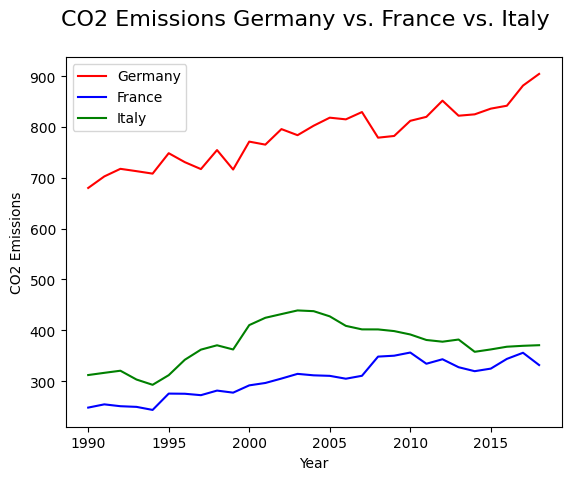

In [42]:
# Create Dataframe with only Germany, France and Italy
co2_df_melted_de = co2_df_melted[co2_df_melted["Country"] == "Germany"]
co2_df_melted_de = co2_df_melted_de.reset_index(drop=True)

co2_df_melted_fr = co2_df_melted[co2_df_melted["Country"] == "France"]
co2_df_melted_fr = co2_df_melted_fr.reset_index(drop=True)

co2_df_melted_it = co2_df_melted[co2_df_melted["Country"] == "Italy"]
co2_df_melted_it = co2_df_melted_it.reset_index(drop=True)
# Let both plots be next to each other and be in relation to each other
fig, ax1 = plt.subplots()

fig.suptitle('CO2 Emissions Germany vs. France vs. Italy', fontsize=16)

ax1.set_xlabel('Year')
ax1.set_ylabel('CO2 Emissions', color="black")
ax1.plot(co2_df_melted_de["Year"], co2_df_melted_de["CO2 Emissions"], color="red", label="Germany")
ax1.plot(co2_df_melted_fr["Year"], co2_df_melted_fr["CO2 Emissions"], color="blue", label="France")
ax1.plot(co2_df_melted_it["Year"], co2_df_melted_it["CO2 Emissions"], color="green", label="Italy")
ax1.legend(loc="upper left")
ax1.tick_params(axis='y', labelcolor="black")

## 5. Findings

### 5.1 1. Finding

### 5.2 2. Finding